# Worksheet 1

### This notebook contains the first set of exercises for the Open Quantum Systems course. By completing these exercises, you will learn methods to predict the dynamics of open quantum systems while also getting experience of programming in Python. Each of the 8 questions below is worth 10 marks. When completing the numerical exercises, please remember the following guidelines:
### - *Comment* your code to explain what each part does. I cannot award marks if I do not understand what you are trying to do. Conversely, you will gain marks for well-commented code even if it does not solve the problem.
### - Define variables and functions to make your code more readable and adaptable. This is especially useful when repeating the same calculation with different parameters.
### - Don't be afraid to look online for help! The [documentation](https://docs.python.org/3/#) is a good place to start but you can find many other useful sources with your favourite search engine.

---

In [16]:
# Name: Shane Keane
# Student no: 15323670
# email: skeane3@tcd.ie

In [17]:
# imports

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import pandas as pd

1. In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

    (a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that
    
    $$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$
    
    [Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]

    (b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the lecture notes. Explicitly verify the anti-commutation relation
    
    $$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$
    
    for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
    commutation and anti-commutation relations (or otherwise), verify the identity:
    
    $$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  
    
    where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.
    
    (c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that
    
    $$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$
    
    Use this result to show that, in general,
    
    $$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$
    
    (d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
    calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:
    
    $$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$
    
    (e) Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. Plot your analytical result as a function of the dimensionless time variable $\omega t$ using [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). (Remember to label your axes!) 

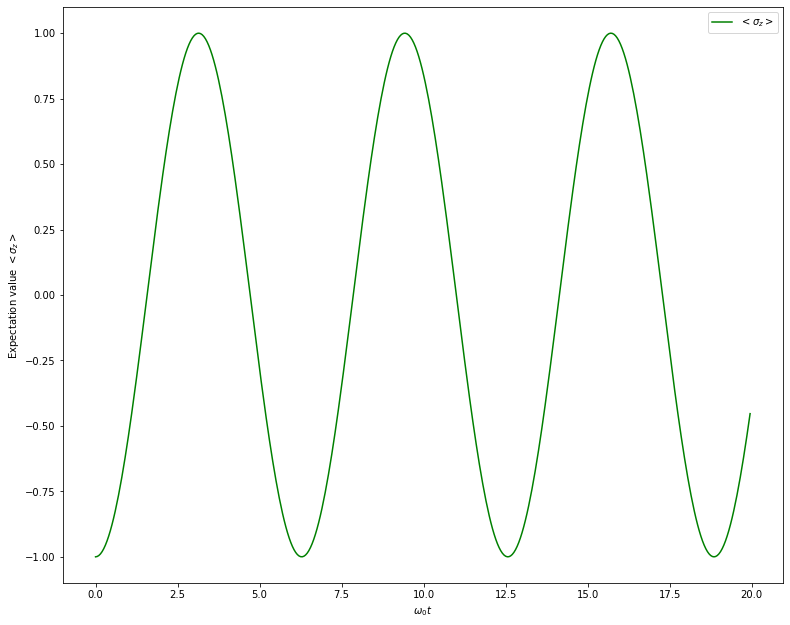

In [18]:
# set the Pauli z operator
pz = np.array([[1,0], [0,-1]])
# Set the initial state
phi = np.array([[0],[1]])
# Necessary parameters
dt = 0.05 # time interval
wt_max = 20 # max time value
n = int(wt_max/dt) # number of steps
wt = np.arange(0, wt_max, dt) # array to store different time values over which system will be evolved

    
# Setup a figure and plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(wt, (np.sin(wt/2))**2 - (np.cos(wt/2))**2, color='g', label = f'$< \sigma_z >$')
ax.set_xlabel('$\omega_0 t$')
ax.set_ylabel('Expectation value $<\sigma_z>$')
plt.legend()

plt.show()

2. Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$. 
    
    (a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [19]:
# Set parameters for the problem
hw = 0.2
u = np.array([1, 1, 0])/(np.sqrt(2))

# Initialise the Pauli operators
px = np.array([[0,1], [1,0]])
py = -1j*np.array([[0,-1], [1,0]])
pz = np.array([[1,0], [0,-1]])

# Result of dot product between our u vector with our sigma vector
u_sig = u[0]*px + u[1]*py + u[2]*pz

# Set the Hamiltonian
H = (hw/2)*u_sig

# Square the Hamiltonian
H_2 = H@H

# Compare our expected result to the actual result
expected = ((hw/2)**2)*np.identity(2)
print(f'Actual result:\n {H_2}\n')
print(print(f'Expected result:\n {expected}\n'))


Actual result:
 [[0.01+0.j 0.  +0.j]
 [0.  +0.j 0.01+0.j]]

Expected result:
 [[0.01 0.  ]
 [0.   0.01]]

None


(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [20]:
# Set initial state
phi = np.array([0, 1])
# Acting on the state with the Hamiltonian, we see that the result has 
# a non-zero component in |0> and zero in |1>, and so cannot be a scalar 
# multiple of phi
print(f'H|phi> =  \n {H@phi}')

# Calcculate and unpack the eigenvectors of H
eig_vecs = np.linalg.eig(H)[1]

print(f'\n Eigenvectos of H are:\n {eig_vecs}')

H|phi> =  
 [0.07071068+0.07071068j 0.        +0.j        ]

 Eigenvectos of H are:
 [[ 0.5       +0.5j  0.70710678+0.j ]
 [ 0.70710678+0.j  -0.5       +0.5j]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [21]:
# let h_bar = 1
# Set time step
dt = 0.05
# Set time evolution operator
U = expm(-1j*dt*H)

# Shows that U^dagger*U is the identity
print(np.round(U.conjugate().transpose()@U))

[[ 1.+0.j -0.+0.j]
 [-0.-0.j  1.+0.j]]


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

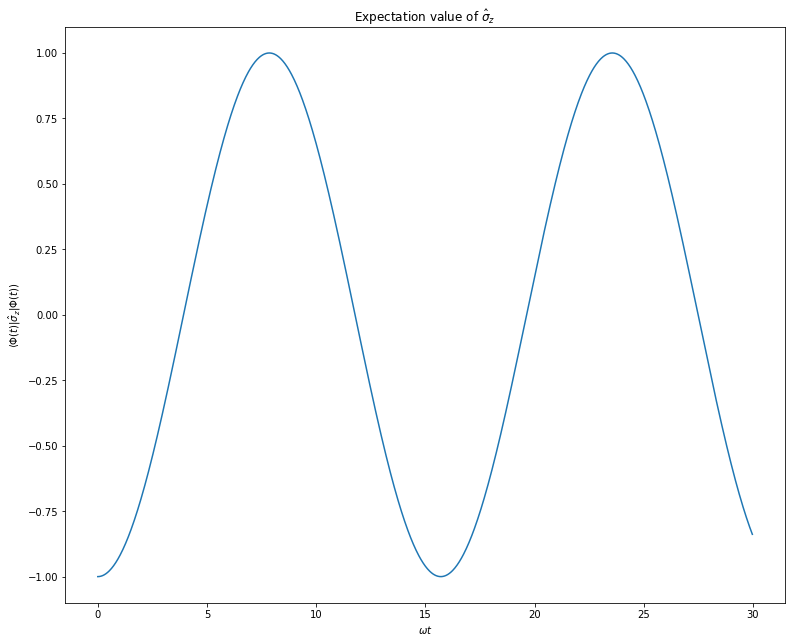

In [22]:
# set system parameters
wt_end = 30
dt = 0.125
w = 0.2
n = int(wt_end/(w*dt))

# set initial state
phi = np.array([0, 1])

# set array to store expectation values of Pauli z
e_z = np.zeros(n)
# store expectation value at time = 0
e_z[0] = phi@pz@phi

# iteratively evolve the state phi in time and calcultate the 
# expectation value of Pauli z at this new time and store in the e_z array
for i in range(1, n):
  phi = U@phi
  e_z[i] = phi.conjugate().transpose()@pz@phi

# set a time array to plot against    
wt = np.arange(0, wt_end, w*dt)

# Setup a figure and plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(wt, e_z)
ax.set_xlabel('$\omega t$')
ax.set_ylabel('$\langle \Phi(t)|\hat{\sigma}_z|\Phi(t) )$')
ax.set_title('Expectation value of $\hat{\sigma}_z$')


plt.show()

3. Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

    (a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation
	
    $$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$
    
    where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.
    
    (b) Show that the same equation can be expressed in the form
    
    $$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$
    
    and find an explicit expression for the matrix $\mathbf{M}$.
    
    (c) Convince yourself that the explicit solution of the above equation is 
    
    $$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$
    
    Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

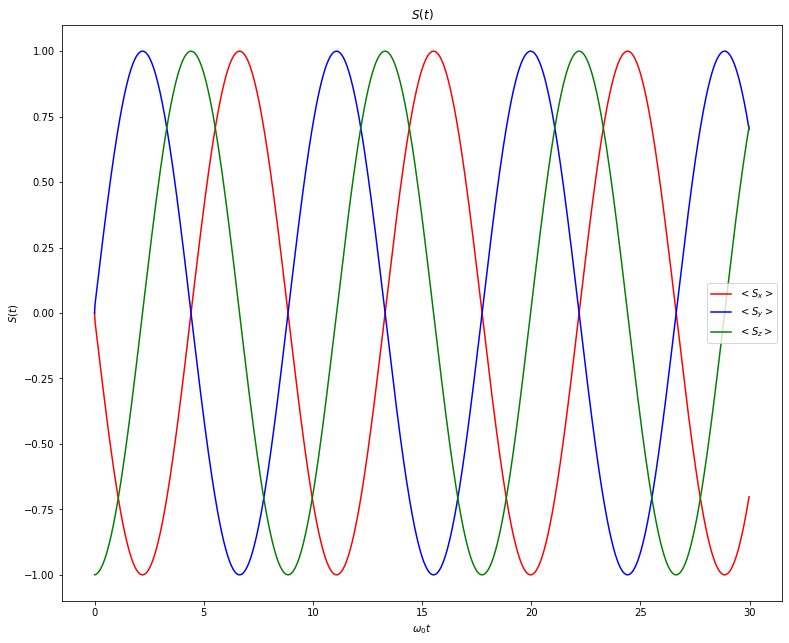

In [23]:
# set system parameters
dt = 0.125
wt_end = 30
w = 0.2
dwt = w*dt
n = int(wt_end/(dwt))
wt = np.arange(0, wt_end, dwt)

# Set M matrix (no w factor as this is incorporated into the time component)
M = np.array([[0, -u[2], u[1]], [u[2], 0, -u[0]], [-u[2], u[0], 0]])

# set initial state
phi = np.array([0, 1])
# set arrays to store values of S component wise ie S = (s_x, s_y, s_z)
s_x = np.zeros(n)
s_y = np.zeros(n)
s_z = np.zeros(n)
# Set the initial values of S
s_x[0] = phi.conjugate().transpose()@px@phi
s_y[0] = phi.conjugate().transpose()@py@phi
s_z[0] = phi.conjugate().transpose()@pz@phi

# Initialise a variable to store S(t=0) and S(t)
# S(0) will remain constant throughout the calculation and 
# S(t) wil store the value of S at each time step
s_0 = np.array([s_x[0], s_y[0], s_z[0]])
s_t = np.array([s_x[0], s_y[0], s_z[0]])

# Iteratively evolve S in time and store its components in 
# their respective arrays

for i in range(1, n):
    s_t = expm(M*dwt)@expm(M*wt[i])@s_0
    s_x[i] = s_t[0]
    s_y[i] = s_t[1]
    s_z[i] = s_t[2]


fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(wt, s_x, color='r', label = f'$< S_x >$')
ax.plot(wt, s_y, color='b', label = f'$< S_y >$')
ax.plot(wt, s_z, color='g', label = f'$< S_z >$')
ax.set_xlabel('$\omega_0 t$')
ax.set_ylabel('$S(t)$')
ax.set_title('$S(t)$')
plt.legend()

plt.show()



4. Consider a qubit with bare Hamiltonian
$$ \hat{H}_{\rm q} = \tfrac{1}{2}\hbar\omega_0 \hat{\sigma}_z,$$
that is driven by a time-dependent perturbation 
$$ \hat{H}_{\rm d}(t) = \hbar\Omega \sin(\omega_{\rm d} t)\hat{\sigma}_x.$$
Using linear-response theory, derive the change in the observables $\delta\langle \hat{\sigma}_x(t)\rangle$ and $\delta\langle \hat{\sigma}_z(t)\rangle$ assuming the initial state is $\lvert \psi(0)\rangle = \lvert \downarrow\rangle$. Plot the results as a function of time for $\Omega = 0.1\omega_0$ and $\omega_{\rm d} = 0.2\omega_0$. What happens when $\omega_{\rm d} = \omega_0$?

5. A driven two-level system is described in the interaction picture by the Hamiltonian

    $$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

    where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. Write down this Hamiltonian as a matrix and derive analytical expressions for its eigenvalues and eigenvectors. Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

6. Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

    $$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$
    
    For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is
    
    $$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$
    
    where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that
    
    $$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      
   
    Now specialise to a driven qubit with Hamiltonian
    
    $$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

    Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

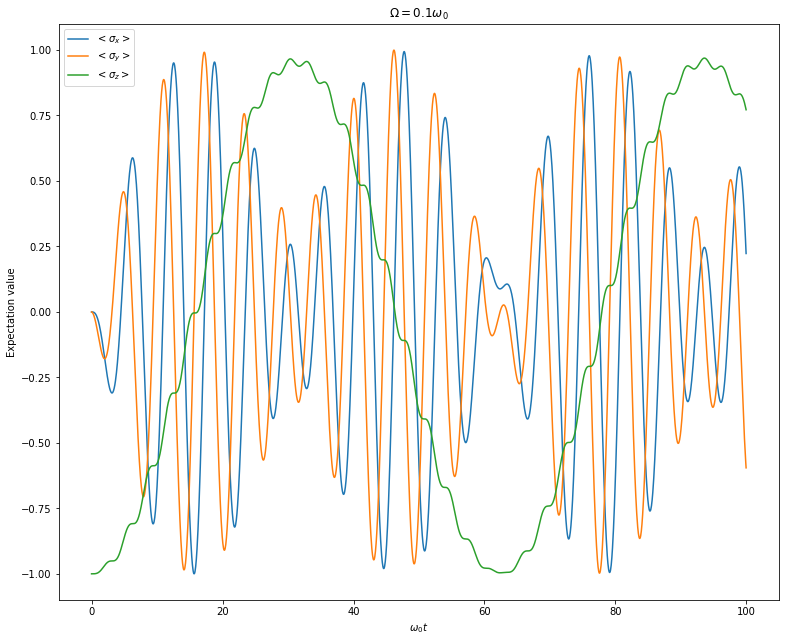

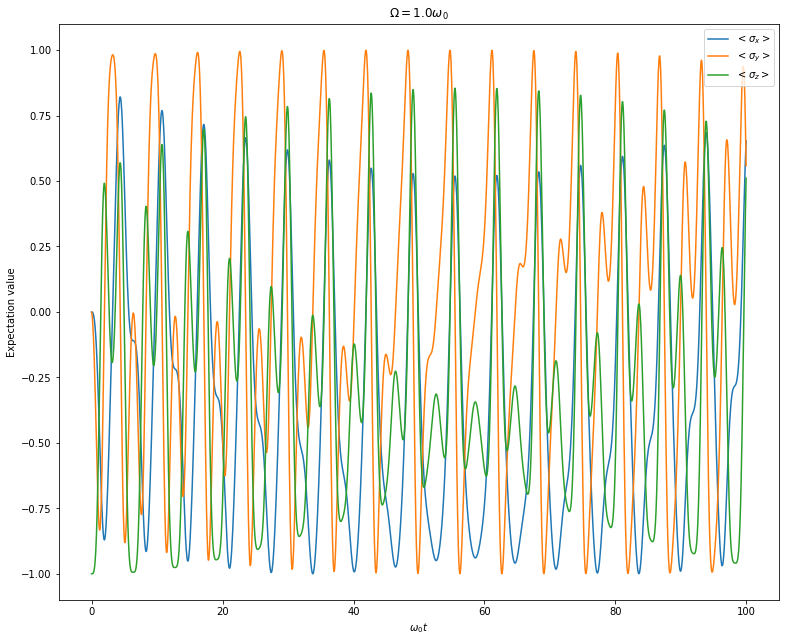

In [24]:
# Function approach

# Set Pauli operators
px = np.array([[0,1], [1,0]])
py = -1j*np.array([[0,-1], [1,0]])
pz = np.array([[1,0], [0,-1]])

# Set system parameters
h = 1
w0 = 1
t_end = int(100/w0)
wd = 0.99*w0
dt = 0.05/w0
n = int(t_end/dt)
t = np.arange(0, t_end, dt)

# Define a function which will allow us to solve for differnt values of omega
def solve_6(omega = w0, wd = wd, t = t, dt = dt, n = n):

    # Set the initial state of phi
    phi = np.array([[0],[1]])

    # These arrays will store the coefficients of the px and pz operators for each times step
    u_x = -1j*dt*omega*np.sin(wd*t)
    u_z = -1j*dt*(w0/2)

    # Define three arrays to store the expectation values of px, py and pz
    e_x, e_y, e_z = np.zeros(n), np.zeros(n), np.zeros(n)
    
    # Calculate the expectation values at tiem t=0
    e_x[0] = ((phi.conjugate().transpose())@px@phi)[0][0]
    e_y[0] = ((phi.conjugate().transpose())@py@phi)[0][0]
    e_z[0] = ((phi.conjugate().transpose())@pz@phi)[0][0]

    # Evolve the system incrementally by dt, updating phi and calculating and storing the
    # expectation values at time t + dt
    for i in range(1, len(t)):
        phi = (expm(u_x[i]*px + u_z*pz))@phi
        e_x[i] = ((phi.conjugate().transpose())@px@phi)[0][0]
        e_y[i] = ((phi.conjugate().transpose())@py@phi)[0][0]
        e_z[i] = ((phi.conjugate().transpose())@pz@phi)[0][0]
    
    # Retrun the expectation values
    return e_x, e_y, e_z

# Define a function that will produce a plot for a desired value of omega.
# The ax variable is an axis object on which to do the plotting and should be 
# created outside the function 
def plot_6(omega, ax):
    e_x, e_y, e_z = solve_6(omega=omega*w0)
    ax.plot(t, e_x, label = f'$< \sigma_x >$')
    ax.plot(t, e_y, label = f'$< \sigma_y >$')
    ax.plot(t, e_z, label = f'$< \sigma_z >$')
    ax.set_xlabel('$\omega_0 t$')
    ax.set_ylabel('Expectation value')
    ax.set_title(f'$\Omega = {omega}\omega_0$')
    ax.legend()

# Set up figures and axes to plot the expectation values
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_axes([0,0,1,1])
fig2 = plt.figure(figsize=(10,8))
ax2= fig2.add_axes([0,0,1,1])

# Produce a plot for the data for different values of omega
plot_6(0.1, ax1)
plot_6(1.0, ax2)
    


plt.show()

7. Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
    
(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

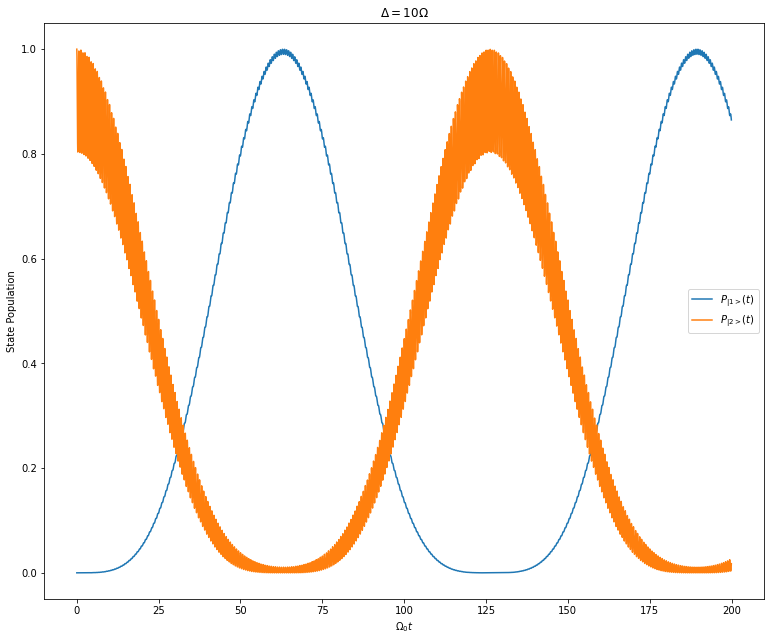

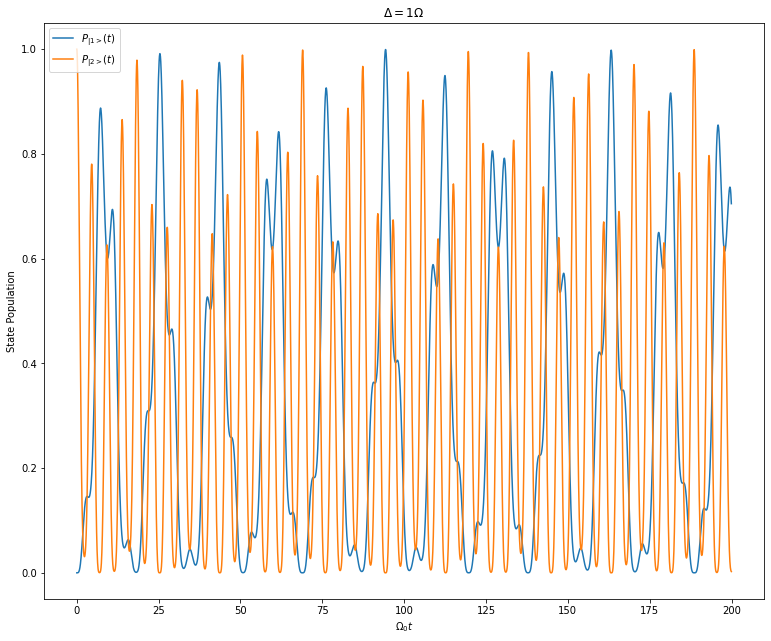

In [25]:
# Set system variables
omega = 1
t_max = 200
dt = 0.05
n = int(t_max/dt)
omega_t = np.arange(0, t_max, dt)


# Define a function to calculate state population of |1> and |2> for the desired
# values of delta and omega
def solve_7(delta = 10, omega = omega, omega_0 = omega, omega_1 = omega):
    # Delta arguement is the multiple of omega we want, so this line calculates its actual value
    delta = delta*omega
    # Define the basis states of the system
    s_0 = np.array([[1],[0],[0]])
    s_1 = np.array([[0],[1],[0]])
    s_2 = np.array([[1],[0],[1]])

    # set the hamiltonian and tiem evolution operator of the sytsem
    H = np.array([[0, 0, omega_0/2],[0,0,omega_1/2],[omega_0/2, omega_1/2, delta]])
    U = expm(-1j*dt*H)
    
    # set the initial state
    phi = np.array([[1],[0],[0]])
    
    # Define two arrays to store the state populations of |1> and |2>
    e_1 = np.zeros(n)
    e_2 = np.zeros(n)
    # Calculate the state populations at time t=0
    e_1[0] = ((s_1.conjugate().transpose())@phi)[0][0]
    e_2[0] = ((s_2.conjugate().transpose())@phi)[0][0]

    # Evolve the system incrementally by dt, updating phi and calculating and storing the
    # state population values at time t + dt
    for i in range(1, n):
        phi = U@phi
        e_1[i] = ((s_1.conjugate().transpose())@phi)[0][0]
        e_2[i] = ((s_2.conjugate().transpose())@phi)[0][0]

    return e_1**2, e_2**2


# Define a function that will produce a plot for a desired value of delta.
# The ax variable is an axis object on which to do the plotting and should be 
# created outside the function 
def plot_7(delta, ax):
    e_1, e_2 = solve_7(delta = delta)
    ax.plot(omega_t, e_1, label = '$P_{|1>}(t)$')
    ax.plot(omega_t, e_2, label = '$P_{|2>}(t)$')
    ax.set_xlabel('$\Omega_0 t$')
    ax.set_ylabel('State Population')
    ax.set_title(f'$\Delta = {delta}\Omega$')
    ax.legend()

# Set up figures and axes to plot the expectation values
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_axes([0,0,1,1])
fig2 = plt.figure(figsize=(10,8))
ax2= fig2.add_axes([0,0,1,1])

# Produce a plot for the data for different values of omega
plot_7(10, ax1)
plot_7(1, ax2)

plt.show()



The graph for $\Delta = 10\Omega$ appears intuitive as it shows the population of the states $|1\rangle$ and $|2\rangle$ are out of phase with one another. This makes sense as these states are orthogonal, and so the population of state $|2\rangle$ is maximised when $|1\rangle$ is minimised, and vice versa.

8. (a) Construct the two-qubit Hamiltonian matrix

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z$$

by combining single-qubit Pauli matrices with [tensor products](https://numpy.org/doc/stable/reference/generated/numpy.kron.html). Choose $\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$. Print out the matrix explicitly and calculate its eigenvalues and eigenvectors. Calculate the overlap between the ground state and the state $|01\rangle = |0\rangle \otimes |1\rangle$. (The single-qubit states $|0\rangle$ and $|1\rangle$ are defined by $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$ for $s=0,1$.)

In [26]:
# Set the system parameters
hw_a = 1
hw_b = 0.5
hJ = 0.5
hV = 0.1

# Set Pauli operators
px = np.array([[0,1], [1,0]])
py = -1j*np.array([[0,-1], [1,0]])
pz = np.array([[1,0], [0,-1]])


# Define H using the np.kron method, which gives the tensor product of two numpy arrays
H = -(hw_a/2)*(np.kron(pz, np.eye(2))) - (hw_b/2)*(np.kron(np.eye(2), pz)) + (hJ/4)*(np.kron(px, px) + np.kron(py, py)) + (hV/2)*(np.kron(pz, pz))
print(f'H = {H} \n')

# Calculate and unpack the eigenvalues and eigenvectors of H
eig_vals, eig_vecs = np.linalg.eig(H)[0], np.linalg.eig(H)[1]

print(f'Eigenvalues =\n {eig_vals}\n')
print(f'Eigenvectors =\n {eig_vecs}\n')

# Define computational basis states |0> and |1> respectively
s0 = np.array([[[1], [0]]])
s1 = np.array([[[0], [1]]])

# Calculate the tensor product state |01>
s0_x_s1 = np.kron(s0, s1)


# get index of ground state energy, and unpack it
i = np.where(eig_vals == min(eig_vals))[0][0]

# get ground state (gs) vector
gs = eig_vecs[:,i]
# get overlap
overlap = (gs@s0_x_s1)[0][0]
print(f'Overlap =  {overlap}')

H = [[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]] 

Eigenvalues =
 [ 0.30355339+0.j -0.40355339+0.j -0.7       +0.j  0.8       +0.j]

Eigenvectors =
 [[-0.        -0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.38268343-0.j  0.92387953+0.j  0.        +0.j  0.        +0.j]
 [ 0.92387953+0.j -0.38268343+0.j  0.        +0.j  0.        +0.j]
 [-0.        -0.j  0.        +0.j  0.        +0.j  1.        +0.j]]

Overlap =  0j


(b) Calculate the expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$ starting from the state $|\psi(0)\rangle = |10\rangle$. (For example, by discretising time into small steps $\Delta t$, as in previous exercises.) Repeat this exercise for the initial state $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$. Plot both results and give a couple of sentences to explain their physical meaning.

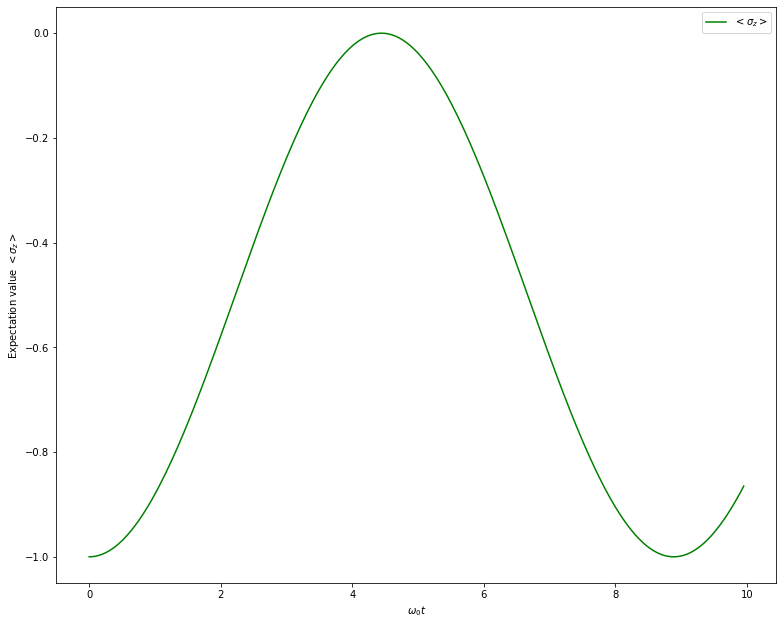

In [27]:
# set problem parameters
t_start = 0
t_end = 10
dt = 0.05
n = int((t_end - t_start)/dt)
t = np.arange(t_start, t_end, dt)

# cross product matrix for Pauli z with the identity 
pz_x_1 = np.kron(pz, np.eye(2))
# cross product matrix for initial state (note unpacking is necessary when using np.kron)
phi, = np.kron(s1, s0)
# Time evolution operator (can be set in a single step as H is time independent)
U = expm(-1j*dt*H)

# array to store expectation value of Pauli z at each time t
e_z = np.zeros(n)
# Store expectation value at time t=0
e_z[0] = ((phi.conjugate().transpose())@pz_x_1@phi)[0][0]

# Iterate over our time intervals, evolving phi and storing the updated expectation 
# value of Pauli z
for i in range(1, n):
    phi = U@phi
    e_z[i] = (phi.conjugate().transpose()@pz_x_1@phi)[0][0]
    
# Plot the data
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(t, e_z, color='g', label = f'$< \sigma_z >$')
ax.set_xlabel('$\omega_0 t$')
ax.set_ylabel('Expectation value $< \sigma_z >$')
plt.legend()

plt.show()


(c) Let's try to generalise this to multi-qubit systems. As a first step, define a list whose first element is 

$$ \hat{\sigma}^{z}_A = \hat{\sigma}_{z}\otimes \hat{\mathbb{1}},$$

and whose second element is

$$ \hat{\sigma}^{z}_B = \hat{\mathbb{1}}\otimes\hat{\sigma}_{z}.$$

Define analogous lists for the operators $\hat{\sigma}^x_{A,B}$ and $\sigma^y_{A,B}$. This extends the single-qubit Pauli matrices to operators acting on the two-qubit Hilbert space. Use these operators and their products to construct the Hamiltonian from part (a). 

In [28]:
# Set lists 2 quibit tensor product for px, py, pz
px_2 = [np.kron(px,np.eye(2)), np.kron(np.eye(2), px)]
py_2 = [np.kron(py,np.eye(2)), np.kron(np.eye(2), py)]
pz_2 = [np.kron(pz,np.eye(2)), np.kron(np.eye(2), pz)]

H_new = -(hw_a/2)*pz_2[0] - (hw_b/2)*pz_2[1] + (hJ/4)*(px_2[0]@px_2[1] + py_2[0]@py_2[1]) + (hV/2)*pz_2[0]@pz_2[1]
print(f'New H = \n {H} \n')


New H = 
 [[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]] 



(d) Now extend this construction to a four-qubit system. More precisely, define three lists (one for each Pauli matrix) of four elements each. Each element will be an operator on the four-qubit Hilbert space, e.g. the first element of one of the lists could be $\hat{\sigma}_x$ for qubit 1, the second element will be $\hat{\sigma}_x$ for qubit 2, etc.

Now generalise this to $L$ qubits. Write a function that takes an integer $L$ as input, and outputs three lists of Pauli operators extended to the $L$-qubit Hilbert space.

In [29]:
I = np.eye(2)


px_4 = [ np.kron(np.kron(px, I), np.kron(I, I))
       , np.kron(np.kron(I, px), np.kron(I, I))
       , np.kron(np.kron(I, I), np.kron(px, I))
       , np.kron(np.kron(I, I), np.kron(I, px))
       ]

py_4 = [ np.kron(np.kron(py, I), np.kron(I, I))
       , np.kron(np.kron(I, py), np.kron(I, I))
       , np.kron(np.kron(I, I), np.kron(py, I))
       , np.kron(np.kron(I, I), np.kron(I, py))
       ]

pz_4 = [ np.kron(np.kron(pz, I), np.kron(I, I))
       , np.kron(np.kron(I, pz), np.kron(I, I))
       , np.kron(np.kron(I, I), np.kron(pz, I))
       , np.kron(np.kron(I, I), np.kron(I, pz))
       ]


def l_quibits(L):
    
    # Define the necessary lists for each operator
    px_L = []
    py_L = []
    pz_L = []
    
    # i will represent the position of the pauli operator in the tensor product (strting from index 0)
    # example for i=2 the entry in pn_L (n = x, y, z) will be 1 x 1 x p_n x ...., where 1 represents 
    # the 2x2 identity
    
    
    for i in range(L):
        # to construct this tensor product, first define a list consisting of all identity entries and then 
        px_l = [np.eye(2) for k in range(L)]
        py_l = [np.eye(2) for k in range(L)]
        pz_l = [np.eye(2) for k in range(L)]
        
        # Then replace the ith entry in the list with the operator pn
        px_l[i] = px
        py_l[i] = py
        pz_l[i] = pz
        
        # Then iterate over the list, taking the tensor product of the first and second entries
        # and store the results in the second position. Then take the tensor product of the 
        # second and third position (the second now contains the tensor product of the first two entries)
        # this is repeatedly until a tensor product is taken over all elements in the list, and the ordering
        # is preserved
        for j in range(L-1):
            px_l[j+1] = np.kron(px_l[j], px_l[j+1])
            py_l[j+1] = np.kron(py_l[j], py_l[j+1])
            pz_l[j+1] = np.kron(pz_l[j], pz_l[j+1])
        # The final tensor product of all elements will now be stored in the last index of the lists pn_l
        px_L.append(px_l[-1])
        py_L.append(py_l[-1])
        pz_L.append(pz_l[-1])
    
    return px_L, py_L, pz_L


(e) The $L$-qubit generalisation of the Hamiltonian from (a) reads as

$$ \hat{H}  = -\sum_{j=1}^L\frac{\hbar\omega_j}{2}\hat{\sigma}_j^z +  \sum_{j=1}^{L-1}\left[\frac{\hbar J}{4} \left ( \hat{\sigma}^x_j  \hat{\sigma}^x_{j+1} + \hat{\sigma}^y_{j} \hat{\sigma}^y_{j+1} \right  ) + \frac{\hbar V}{2}  \hat{\sigma}^z_j \hat{\sigma}^z_{j+1}\right].$$

Construct this Hamiltonian for $L=5$ qubits, with equal local energies $\omega_j = \omega_0$ for all qubits, $ J = \tfrac{1}{2}\omega_0$ and $V = 0$. Compute and plot the time evolution of $\langle \hat{\sigma}^z_1\rangle$ starting from an initial state $|\psi(0)\rangle = |10000\rangle$ up to a time $Jt = 30$. Repeat the calculation for $L=6,7,8,9$ qubits with a similar initial state (i.e. $|\psi(0)\rangle = |100\cdots 00\rangle$). Explore the effect of switching on a finite interaction strength $V$. Briefly discuss (max. one paragraph) the features that you see and the differences between these various examples. 

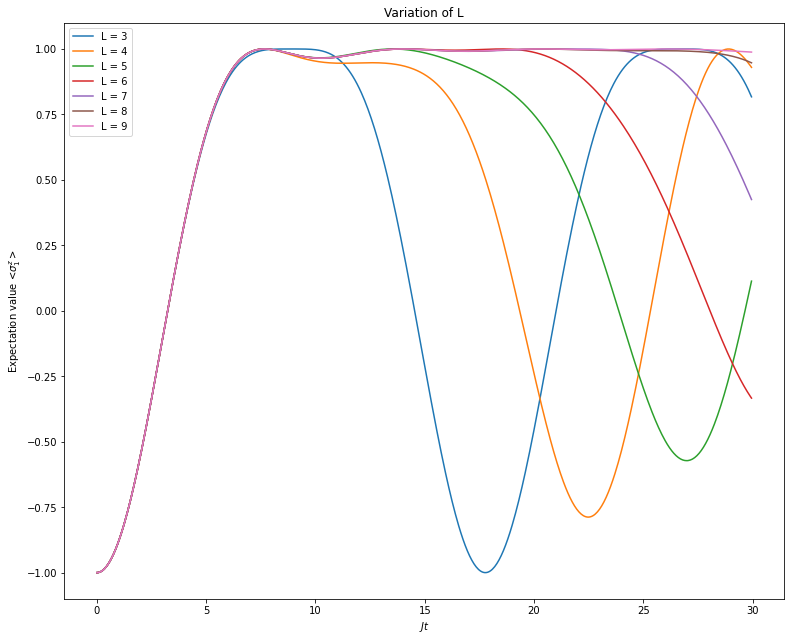

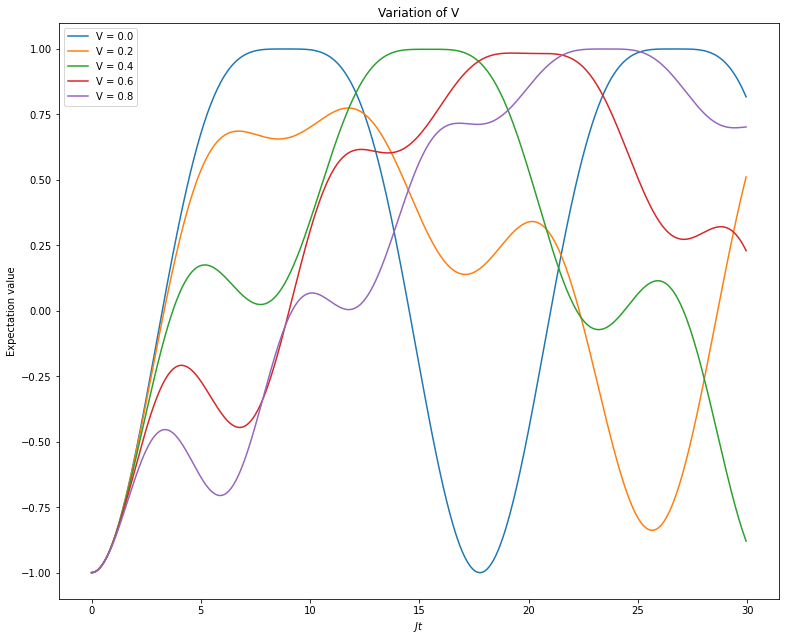

In [30]:
# Set the system parameters
L = 5
V = 0
Jt_end = 30
dt = 0.05
n = int(Jt_end/dt)
Jt = np.arange(0, Jt_end, dt)


def solve_8(L, V = V, dt = dt, n = n):
    # retrieve the relevent lists from the function
    px_L, py_L, pz_L = l_quibits(L)
    
    # This code will sum each element in the pz_L list giving the first term in H
    # Similarly for each term in H is repeated below
    # Note that if the copy method is not used, the value in pz_L[0] will be changed when we change sig_z
    
    # sigma z sum in H
    sig_z = pz_L[0].copy()
    for i in range(1, L):
        sig_z += pz_L[i]

    # sigma x sum in H
    sig_x = px_L[0]@px_L[1]
    for i in range(1, L-1):
        sig_x += px_L[i]@px_L[i+1]

    # sigma y sum in H
    sig_y = py_L[0]@py_L[1]
    for i in range(1, L-1):
        sig_y += py_L[i]@py_L[i+1]

    # sigma z V sum in H
    sig_i = pz_L[0]@pz_L[1]
    for i in range(1, L-1):
        sig_i += pz_L[i]@pz_L[i+1]

    # let hw_0 = 1
    # Define Hamiltonian
    H = -(1/2)*sig_z + (1/8)*sig_x + (1/8)*sig_y + (V/2)*sig_i

    # This is the operator whose expectation value we wish to calculate
    # which is pz x 1 x 1 x 1 x .........
    sig_z_1 = pz_L[0].copy()

    # Set the initial state of phi to be |1> tensored wtih |0>  L-1 times (the Lth term is the state |1>)
    phi = s1
    for i in range(1, L):
        # Note comma to unpack result of kron method
        phi, = np.kron(phi, s0)

    # Define the tiem evolution operator
    U = expm(-1j*dt*H)

    # Array to store expectation values at each time step
    e_z = np.zeros(n)
    # Store expectation value at time t=0
    e_z[0] = ((phi.conjugate().transpose())@sig_z_1@phi)[0][0]

    # Evolve the system for each time step and store the expectation values at that time
    for i in range(1, n):
        phi = U@phi
        e_z[i] = ((phi.conjugate().transpose())@sig_z_1@phi)[0][0]

    return e_z

# Define a figure to plot varying L
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('$Jt$')
ax.set_ylabel('Expectation value <$\sigma_1^z>$')
ax.set_title('Variation of L')

# Define a figure to plot varying V
fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_axes([0,0,1,1])
ax2.set_xlabel('$Jt$')
ax2.set_ylabel('Expectation value')
ax2.set_title('Variation of V')

for i in range(3, 10):
    e_z = solve_8(i)
    ax.plot(Jt, e_z, label = f'L = {i}')

L = 3
for v in np.arange(0, 1, 0.2):
    e_z = solve_8(L, v)
    ax2.plot(Jt, e_z, label = f'V = {round(v, 1)}')

ax.legend()
ax2.legend()
plt.show()



For a fixed value of $V = 0$, and varying L, it can be seen that there is large variation in the expectation value of the operator $\sigma_1^z$. For smaller $L$, (lesser quibit systems) the expectation value oscillates sinusoidally around a mean value of 0 and a range of $[-1, 1]$. As $L$ is increased the mean value increases steadily towards 1 and the range decreases. It can be seen that for larger values of $L$ $(L = 9)$ the expectation value tends to a value of 1, with almost no variation.



The introduction of values of $V>0$ alters the expectation values $\langle \sigma_1^z \rangle$ (for fixed $L=5$). For $V=0$ we see $\langle \sigma_1^z \rangle$ alternate between the expected values of $+1$ and $-1$. The turning on of $V>0$ introduces much greater variation into the expectation values available. We still seet these alternate between $+1$ and $-1$, but these peaks occur much less frequently, and we see much greater variation in between peaks.